In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.lines as mlines

In [136]:
def create_list_to_plot(acc_cost_pairs, label,marker, color ,marker_label):
    list_to_plot = []
    for acc_cost_pair in acc_cost_pairs:
        acc = acc_cost_pair[0]
        cost = acc_cost_pair[1]
        ece = acc_cost_pair[2]
        inef =  acc_cost_pair[3]
        alpha = 100-acc_cost_pair[4]
        dict_point = {'label':label, 'cost': cost, 'gated_acc':acc, 'gated_ece':ece, 'inef':inef,'alpha':alpha, 'marker': marker, 'color':color, 'marker_label': marker_label}
        list_to_plot.append(dict_point)
    return list_to_plot

In [137]:
boosted_acc_pairs = [[39.010, 14.89, 26.76, 5.80, 92.44],  
[40.080, 15.53, 27.78, 5.73, 92.37],  
[41.400, 16.40, 29.02, 5.61, 92.41],  
[43.200, 17.61, 30.69, 5.40, 92.37],  
[45.190, 18.96, 32.51, 5.18, 92.30],  
[47.590, 20.46, 34.68, 4.92, 92.14],  
[50.650, 22.40, 37.43, 4.64, 92.41],  
[53.550, 24.61, 39.93, 4.33, 92.48],  
[57.560, 27.29, 43.42, 4.04, 92.90],  
[61.210, 29.87, 46.58, 3.64, 92.68],  
[64.970, 32.83, 49.73, 3.24, 92.59],  
[68.470, 35.85, 52.63, 2.91, 92.79],  
[71.680, 38.65, 55.26, 2.58, 92.70],  
[74.870, 41.53, 57.85, 2.14, 91.82],  
[77.360, 44.42, 59.79, 1.89, 91.64],  
[79.790, 47.02, 61.71, 1.67, 91.62],  
[81.700, 49.38, 63.17, 1.50, 91.39],  
[83.490, 51.84, 64.52, 1.34, 90.79],  
[85.390, 54.41, 65.97, 1.23, 90.91],  
[86.790, 56.60, 67.01, 1.16, 91.13],  
[88.020, 58.51, 67.92, 1.10, 91.21],  
[89.080, 60.39, 68.70, 1.08, 91.59],  
[90.120, 62.42, 69.45, 1.06, 92.09],  
[90.800, 63.93, 69.93, 1.04, 92.39],  
[91.440, 65.17, 70.40, 1.03, 92.59],  
[91.780, 66.32, 70.60, 1.02, 92.63],  
[92.240, 67.50, 70.91, 1.01, 92.80],  
[92.670, 68.48, 71.21, 1.01, 93.12],  
[92.900, 69.33, 71.35, 1.01, 93.23],  
[93.160, 70.25, 71.51, 1.01, 93.45],  
[93.340, 70.88, 71.63, 1.00, 93.47],  
[93.530, 71.62, 71.74, 0.99, 93.28],  
[93.670, 72.21, 71.83, 0.99, 93.33],  
[93.790, 72.81, 71.90, 0.99, 93.37],  
[93.960, 73.42, 72.01, 0.99, 93.52],  
[94.050, 73.88, 72.06, 0.99, 93.51],  
[94.150, 74.34, 72.12, 0.99, 93.47],  
[94.200, 74.74, 72.14, 0.99, 93.49],  
[94.280, 75.14, 72.19, 0.99, 93.55]]
label = 'boosted'
marker_label = 'boosted'
color = 'c'
marker = '.'
boosted_list_dict = create_list_to_plot(boosted_acc_pairs, label,marker, color ,marker_label)

In [138]:
app4 = [[54.1,24.5,13.9, 4.4, 94.7],[83.3, 49.7,12.1, 1.85,93.6],[90.7, 59.6, 7.5,1.2,94.0],[93.1,66.3,4.8,1.0,94.1]]
label = 'Ours.'
marker_label = 'Ours.'
color = 'b'
marker = '^'
our_4results = create_list_to_plot(app4, label,marker, color ,marker_label)

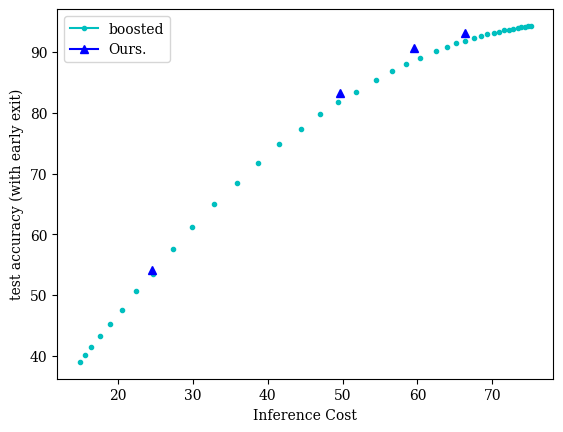

In [139]:
font = {'family' : 'serif',
        'size'   : 10}

combined_dicts = boosted_list_dict+our_4results
matplotlib.rc('font', **font)

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_acc = dict_of_result['gated_acc']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_acc, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('Inference Cost')
ax.set_ylabel('test accuracy (with early exit)')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('perf_cost_app1vs3.pdf')

In [140]:
plt.close()

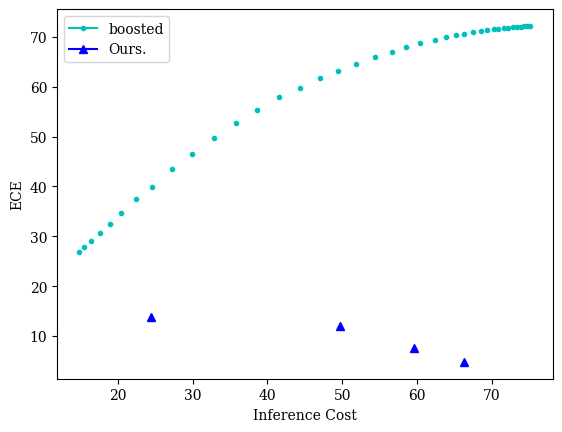

In [141]:

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('Inference Cost')
ax.set_ylabel('ECE')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('ece_cost.pdf')

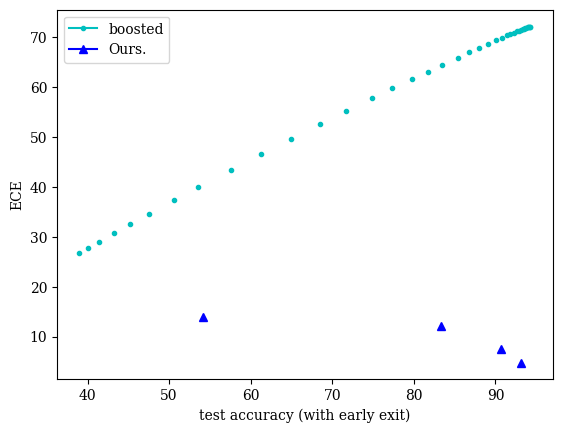

In [142]:

matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    gated_acc = dict_of_result['gated_acc']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(gated_acc, gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('test accuracy (with early exit)')
ax.set_ylabel('ECE')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('acc_ece.pdf')

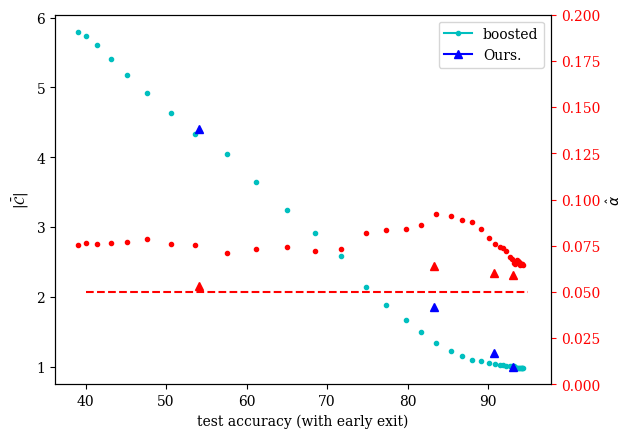

In [145]:
matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
ax2=ax.twinx()
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    gated_acc = dict_of_result['gated_acc']
    marker = dict_of_result['marker']
    gated_inef = dict_of_result['inef']
    alpha = dict_of_result['alpha']/100
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(gated_acc, gated_inef, marker, color=dict_of_result['color'])
    ax2.plot(gated_acc, alpha, marker, color='r')
# fig.xlabel('- inference cost')
patches = []
ax2.set_ylim([0, 0.2])
ax2.hlines(0.05, 40, 95, color='r', linestyles='dashed')
ax2.set_ylabel(r'$\hat{\alpha}$')
ax2.tick_params(axis='y', colors='red')
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('test accuracy (with early exit)')
ax.set_ylabel(r'$\bar{|\mathcal{C}|}$')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('acc_inef.pdf')

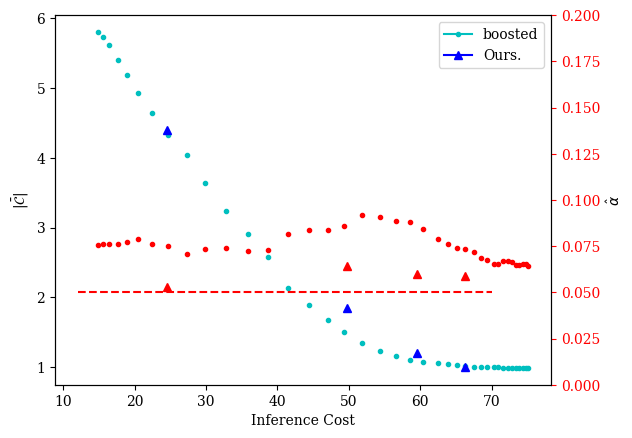

In [146]:
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
ax2=ax.twinx()
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_inef = dict_of_result['inef']
    alpha = dict_of_result['alpha']/100
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_inef, marker, color=dict_of_result['color'])
    ax2.plot(cost, alpha, marker, color='r')
# fig.xlabel('- inference cost')
ax2.set_ylim([0, 0.2])
ax2.hlines(0.05, 12, 70, color='r', linestyles='dashed')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax2.set_ylabel(r'$\hat{\alpha}$')
ax2.tick_params(axis='y', colors='red')
ax.set_xlabel('Inference Cost')
ax.set_ylabel(r'$\bar{|\mathcal{C}|}$')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('inef_cost.pdf')